# Decision Trees for Regression (Regression Trees)

In [10]:
# import required packages
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import sample date
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/I_CustomerLoyalty/sample_data_regression.csv"
sample_data = pd.read_csv(data_path)
print(sample_data.shape)
sample_data.head()

(100, 4)


,output,input1,input2,input3
0,564,534,536,466
1,182,264,103,244
2,323,272,339,609
3,438,416,444,330
4,547,520,464,104


In [3]:
# Split data into input and putput objects
X = sample_data.drop(['output'], axis=1)
Y = sample_data['output']
print(X.shape)
X.head()

(100, 3)


,input1,input2,input3
0,534,536,466
1,264,103,244
2,272,339,609
3,416,444,330
4,520,464,104


In [4]:
print(Y.shape)
Y.head()

(100,)


0    564
1    182
2    323
3    438
4    547
Name: output, dtype: int64

In [5]:
# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train.head()

(80, 3)
(20, 3)
(80,)
(20,)


,input1,input2,input3
55,395,459,738
88,536,529,186
26,486,459,204
42,323,362,368
69,525,535,659


In [6]:
# instantiate our model object
regressor = DecisionTreeRegressor() # default settings

In [7]:
# train our model
regressor.fit(x_train,y_train)
print(regressor)

DecisionTreeRegressor()


In [8]:
# assess model accuracy
y_pred = regressor.predict(x_test)
r2_score(y_test,y_pred)

0.4798082805453189

In [9]:
# demonstration of over fitting
# decision trees are prone to this

# assess model accuracy
y_pred_training = regressor.predict(x_train)
r2_score(y_train,y_pred_training)

1.0

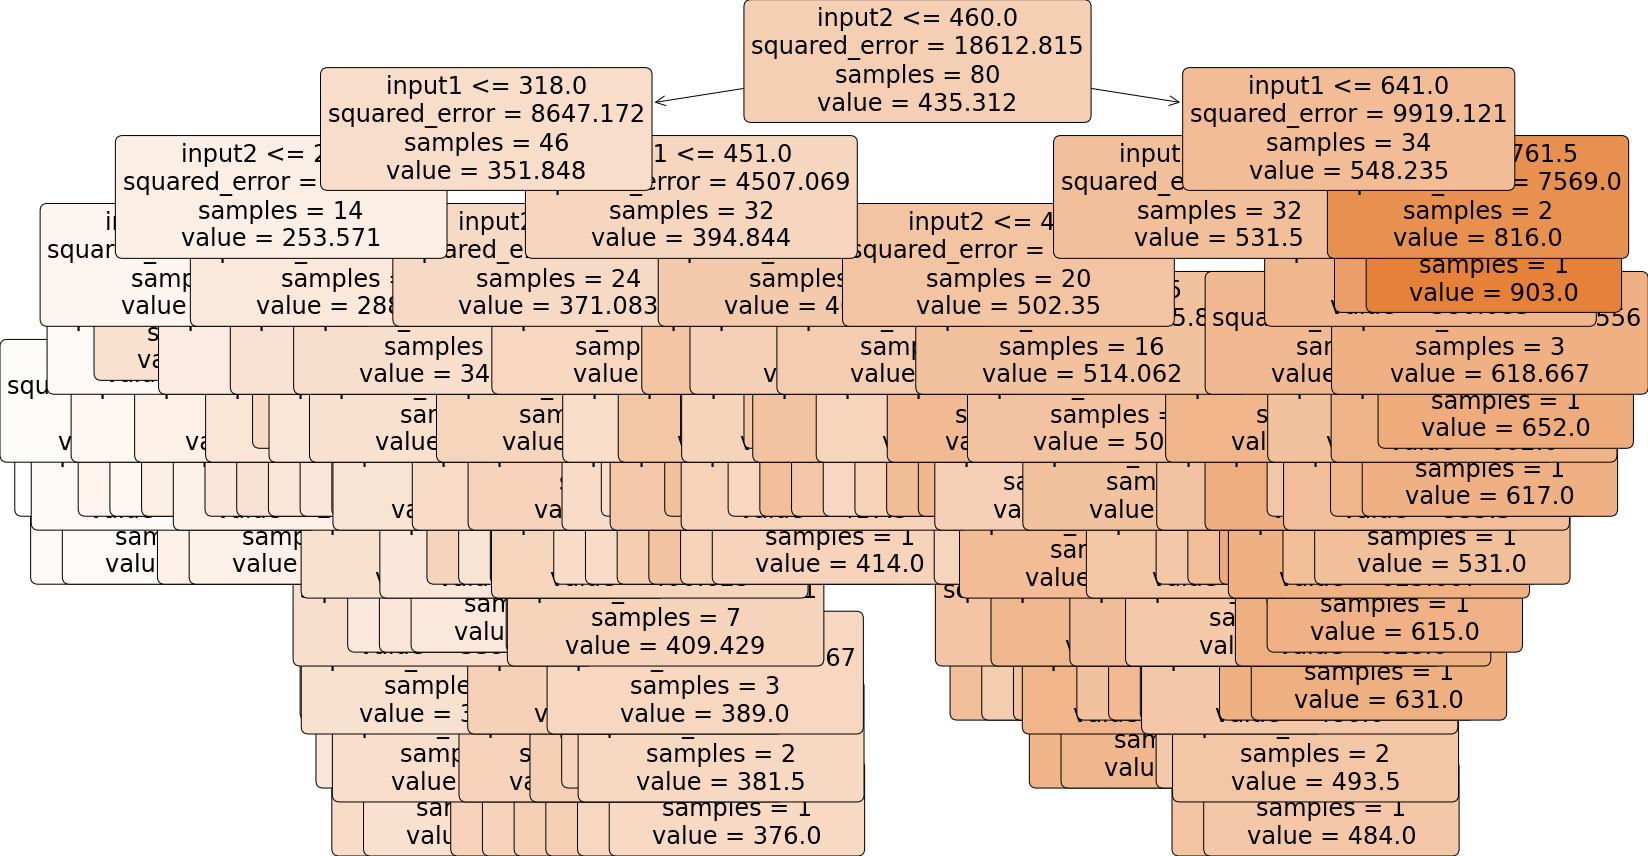

In [11]:
# plot our decision tree
plt.figure(figsize=(25,15))
tree = plot_tree(regressor,
                 feature_names=X.columns,
                 filled=True,
                 rounded = True,
                 fontsize=24)
# literally example of overfitting

In [12]:
regressor = DecisionTreeRegressor(min_samples_leaf=7)
# train our model
regressor.fit(x_train,y_train)
print(regressor)
# assess model accuracy
y_pred = regressor.predict(x_test)
r2_score(y_test,y_pred)


DecisionTreeRegressor(min_samples_leaf=7)


0.6570032913425767

In [13]:
# assess model accuracy
y_pred_training = regressor.predict(x_train)
r2_score(y_train,y_pred_training)

0.7959618194306971

because .79 is greater than .65 it still means we are over fitting

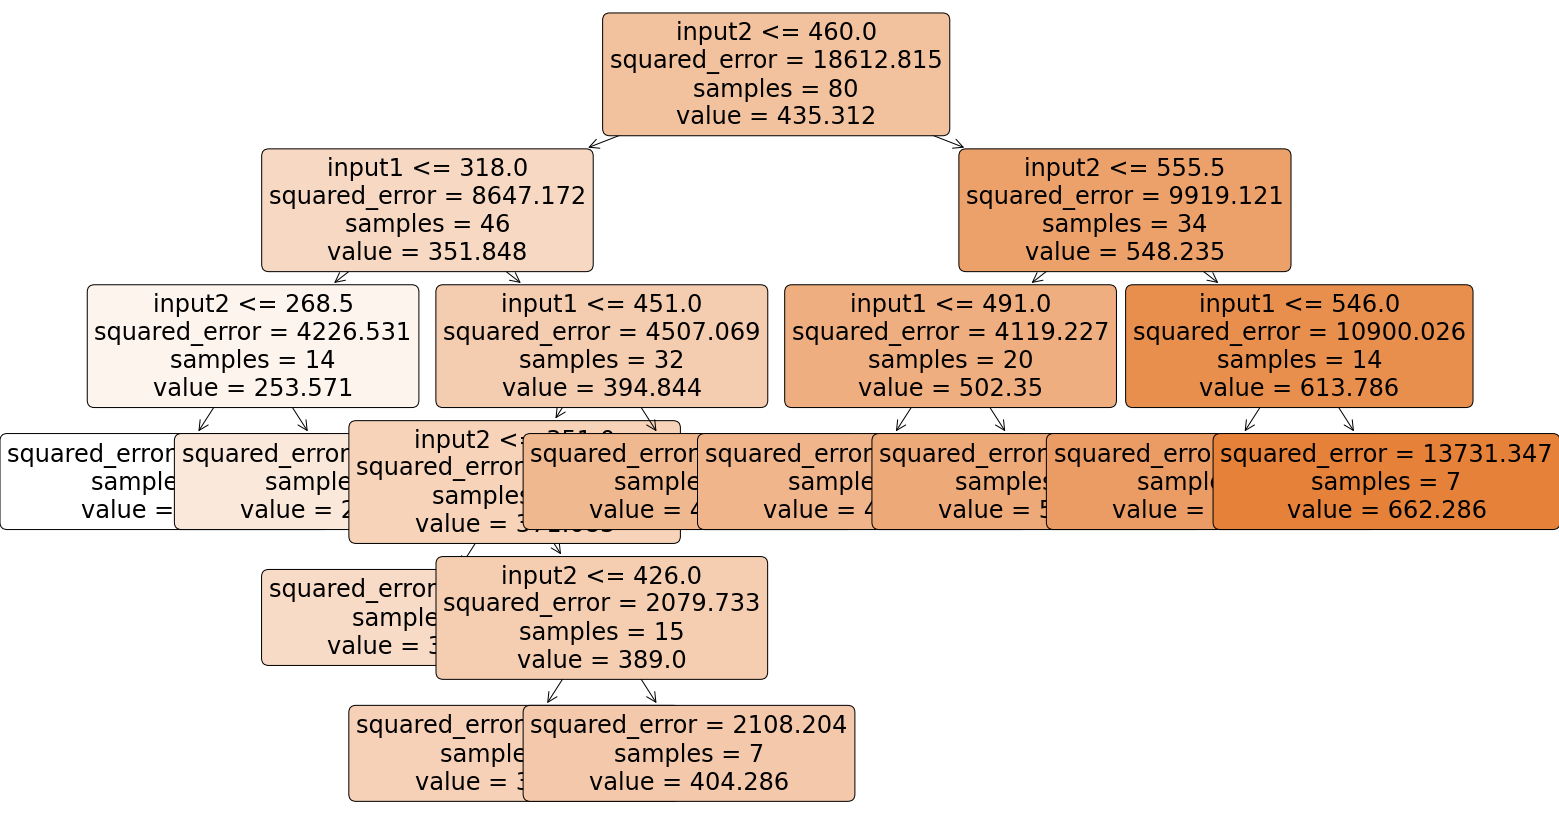

In [14]:
# plot our decision tree
plt.figure(figsize=(25,15))
tree = plot_tree(regressor,
                 feature_names=X.columns,
                 filled=True,
                 rounded = True,
                 fontsize=24)